In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Violin graph

Empty DataFrame
Columns: [cpu_tier, cpu_cores, cpu_threads, cpu_base_ghz, cpu_boost_ghz, gpu_tier, vram_gb, ram_gb, storage_gb, display_size_in, weight_kg, price]
Index: []


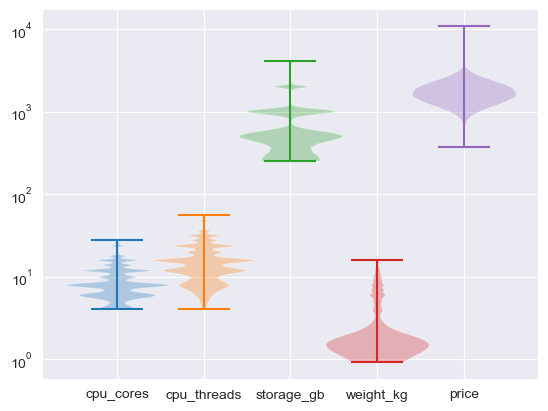

In [3]:
pcs = pd.read_csv('./computer_prices_all.csv').drop(columns=['model', 'warranty_months', 'bluetooth', 'wifi','resolution']).drop(columns=['psu_watts', 'charger_watts', 'battery_wh', 'refresh_hz'])
pcs = pcs.drop(columns=['gpu_model','release_year','storage_drive_count'])
nnomPcs = pcs.drop(columns=["device_type","brand","os","form_factor","cpu_brand","cpu_model","gpu_brand","storage_type","display_type"])
print(nnomPcs.head(n = 0))
h = nnomPcs.values.transpose()
r = range(0,5)
ind = [1,2,8,10,11]

for i in r:
    plt.violinplot(h[ind[i]], [i], widths=1.2)
    #plt.scatter(np.full((1,h[i].size), i), h[i])
plt.xticks(r, nnomPcs.columns[ind])
plt.yscale('log')
plt.show()

## Timo

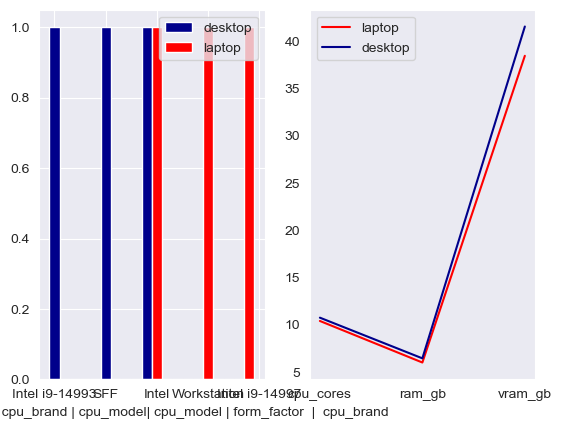

In [4]:
df = pd.read_csv('./computer_prices_all.csv',sep=',')
df = df.drop(columns=['brand', 'model', 'release_year', 'os', 'cpu_tier', 'cpu_threads', 'cpu_base_ghz', 'cpu_boost_ghz', 'gpu_tier', 'gpu_brand', 'gpu_model', 'storage_type', 'storage_gb', 'storage_drive_count', 'display_type', 'display_size_in', 'resolution', 'refresh_hz', 'battery_wh', 'charger_watts', 'psu_watts', 'wifi', 'bluetooth', 'weight_kg', 'warranty_months', 'price'])
laptops = df[df['device_type']=='Laptop']
lap1=[laptops['cpu_cores'].mean(), laptops['vram_gb'].mean(), laptops['ram_gb'].mean()]
lap2 = [laptops['form_factor'].max(), laptops['cpu_brand'].max(), laptops['cpu_model'].max()]
desktops = df[df['device_type']=='Desktop']
desk1=[desktops['cpu_cores'].mean(), desktops['vram_gb'].mean(), desktops['ram_gb'].mean()]
desk2 = (desktops['cpu_model'].max(), desktops['form_factor'].max(), desktops['cpu_brand'].max())
vals = ['cpu_cores', 'ram_gb', 'vram_gb']
lap = pd.Series(lap1, index=vals)
desk = pd.Series(desk1, index=vals)
fig, (ax0,ax1) = plt.subplots(1, 2)
ax0.hist(desk2, color='darkblue', align='left', label='desktop')
ax0.hist(lap2, color='red', align='left', label='laptop')
ax0.legend()
ax0.set_xlabel ('form_factor  | cpu_brand | cpu_model| cpu_model | form_factor  |  cpu_brand')
ax1.plot(lap, color='red', label='laptop')
ax1.plot(desk, color='darkblue', label='desktop')
ax1.legend()
ax1.grid()
plt.show()

## Alex

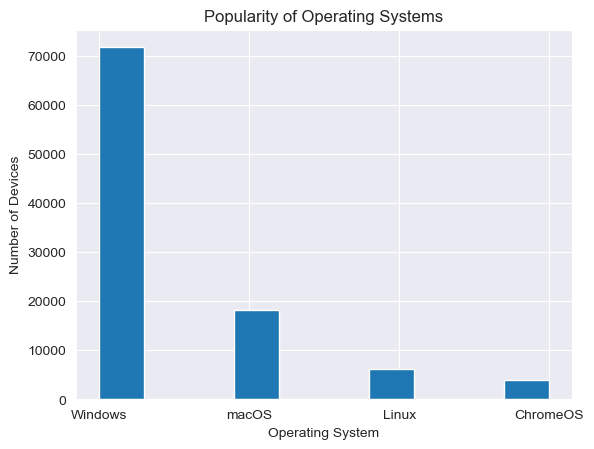

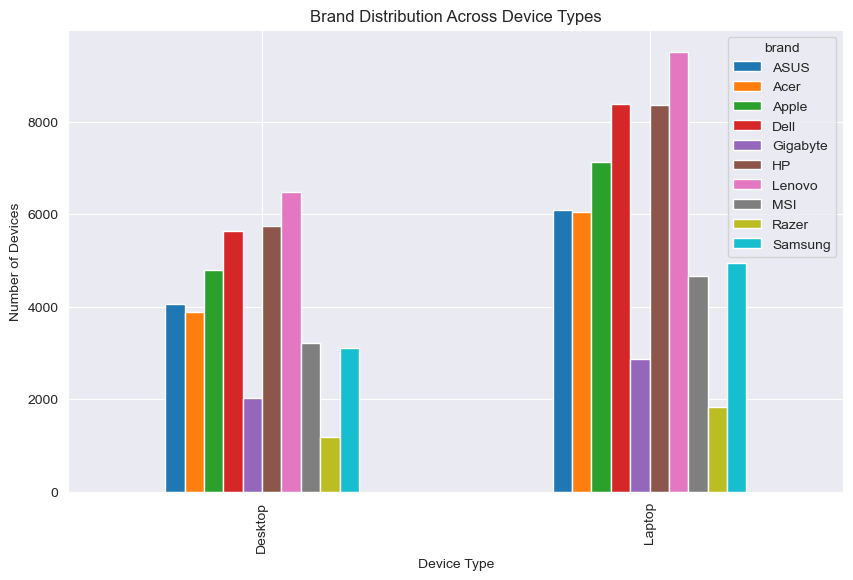

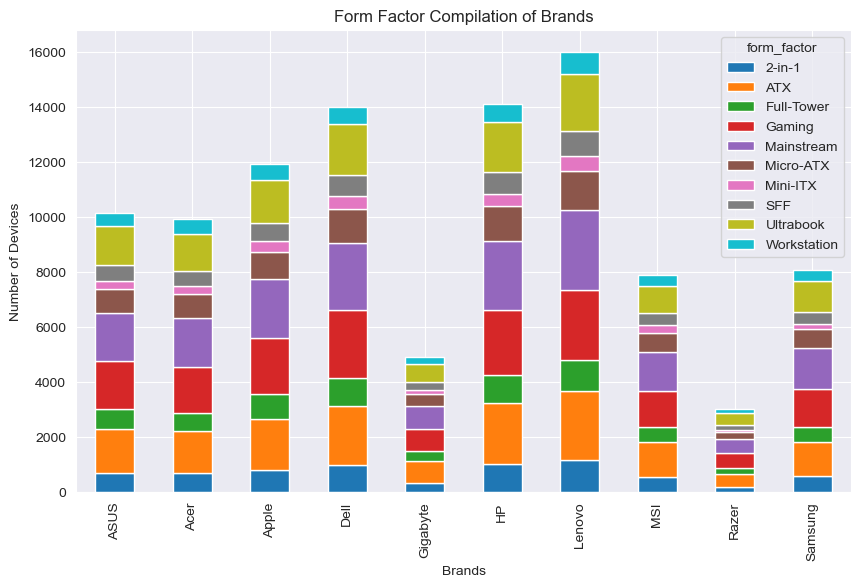

In [5]:
df = pd.read_csv("./computer_prices_all.csv")

#dev = df["device_type"].to_numpy()
os = df["os"].to_numpy()
#brands = df["brand"].to_numpy()
#form_factor = df["form_factor"].to_numpy()

y = "Number of Devices"

#bins = ["Windows", "macOS", "Linux", "ChromeOS"]
# Operating Systems - Popularity
plt.hist(os)
plt.title("Popularity of Operating Systems")
plt.xlabel("Operating System")
plt.ylabel(y)
plt.show()
#plt.savefig("os_pop.jpg")

# Brands on Desktop / Laptop
#df.groupby(["device_type", "brand"]).size().unstack().plot(kind="bar", stacked=True, figsize=(10,6))
df.groupby(["device_type", "brand"]).size().unstack().plot(kind="bar", stacked=False, figsize=(10,6))
plt.title("Brand Distribution Across Device Types")
plt.xlabel("Device Type")
plt.ylabel(y)
plt.show()
#plt.savefig("brands_dev_stacked.jpg")
#plt.savefig("brands_dev_non_stacked.jpg")


df.groupby(["brand", "form_factor"]).size().unstack().plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Form Factor Compilation of Brands")
plt.xlabel("Brands")
plt.ylabel(y)
plt.show()



## Herbert

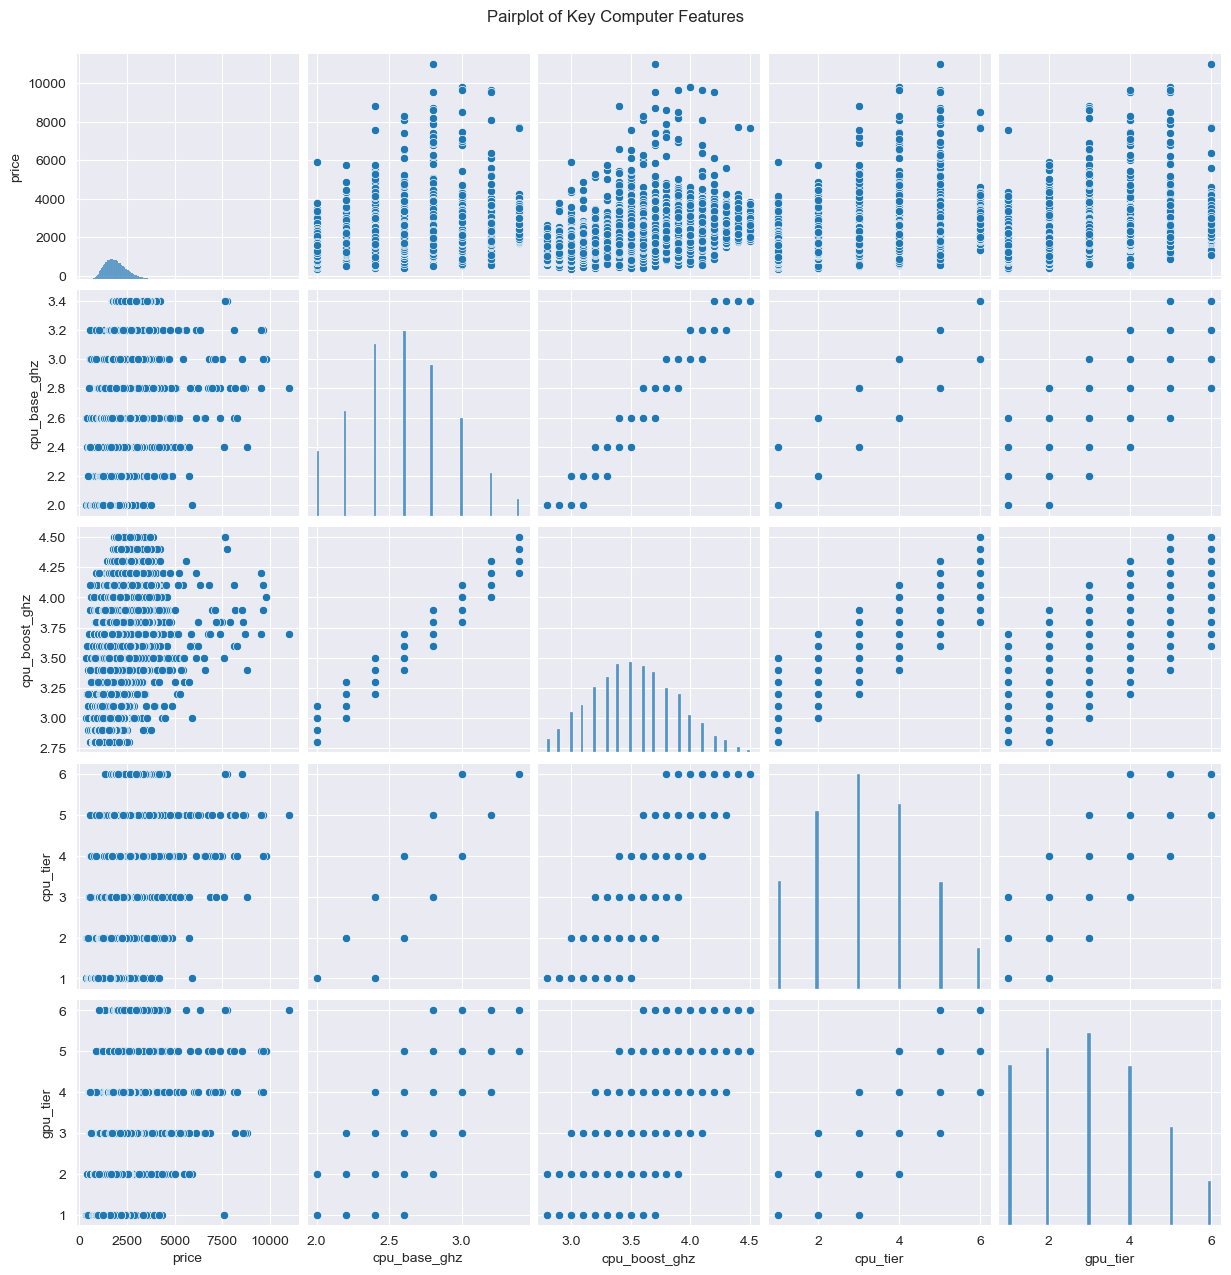

                  price  cpu_base_ghz  cpu_boost_ghz  cpu_tier  gpu_tier  \
price          1.000000      0.529910       0.508507  0.759196  0.762875   
cpu_base_ghz   0.529910      1.000000       0.960884  0.812598  0.756057   
cpu_boost_ghz  0.508507      0.960884       1.000000  0.780649  0.725862   
cpu_tier       0.759196      0.812598       0.780649  1.000000  0.857225   
gpu_tier       0.762875      0.756057       0.725862  0.857225  1.000000   
ram_gb         0.758654      0.761927       0.731896  0.899349  0.912918   
vram_gb        0.305017      0.365730       0.351984  0.409049  0.498624   
cpu_cores      0.720464      0.784946       0.754672  0.937376  0.812393   
cpu_threads    0.577503      0.711287       0.684021  0.848197  0.735096   

                 ram_gb   vram_gb  cpu_cores  cpu_threads  
price          0.758654  0.305017   0.720464     0.577503  
cpu_base_ghz   0.761927  0.365730   0.784946     0.711287  
cpu_boost_ghz  0.731896  0.351984   0.754672     0.684021  

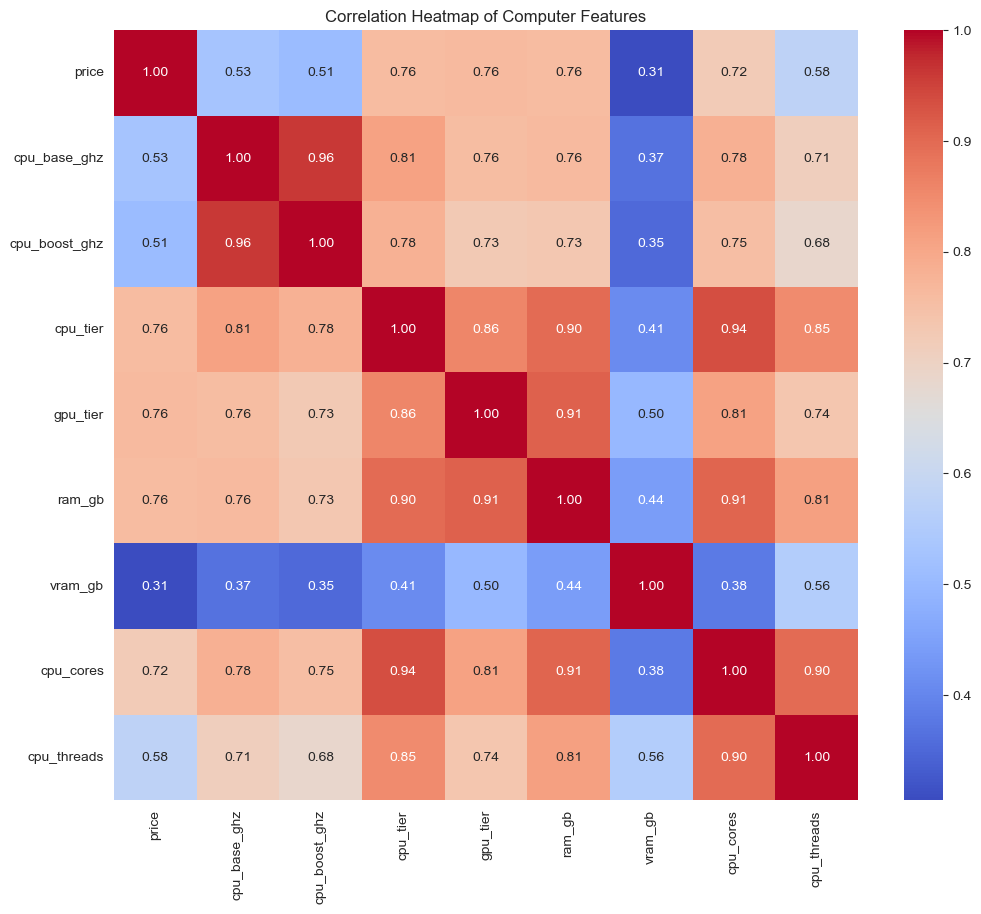

In [8]:
numerical_cols = [
    "price", "cpu_base_ghz", "cpu_boost_ghz", "cpu_tier", "gpu_tier",
    "ram_gb", "vram_gb", "cpu_cores", "cpu_threads"
]

computers_pd = pd.read_csv('./computer_prices_all.csv')


sns.pairplot(computers_pd[numerical_cols[0:5]])
plt.suptitle("Pairplot of Key Computer Features", y=1.02) # Title above the plot
plt.show()

computers_numerical_pd = computers_pd[numerical_cols]
computers = computers_numerical_pd.values

corr_matrix_pd = computers_numerical_pd.corr()
print(corr_matrix_pd)


plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix_pd,
    annot=True,     # Show the numbers in each cell
    cmap='coolwarm',  # Use a diverging colormap
    fmt=".2f"       # Format numbers to 2 decimal places
)
plt.title("Correlation Heatmap of Computer Features")
plt.show()


## Nicholas

C:\Users\tombo\AppData\Local\Temp\ipykernel_2888\658975425.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='brand', y='price', data=brandcost, palette='Set3')


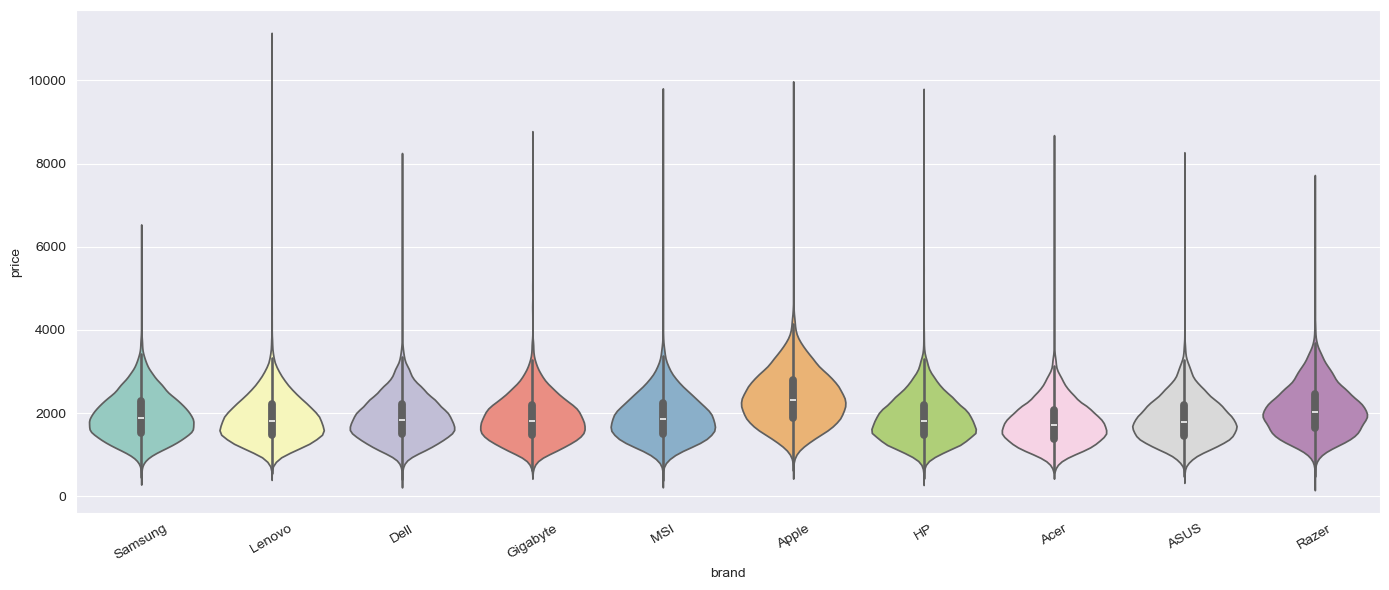

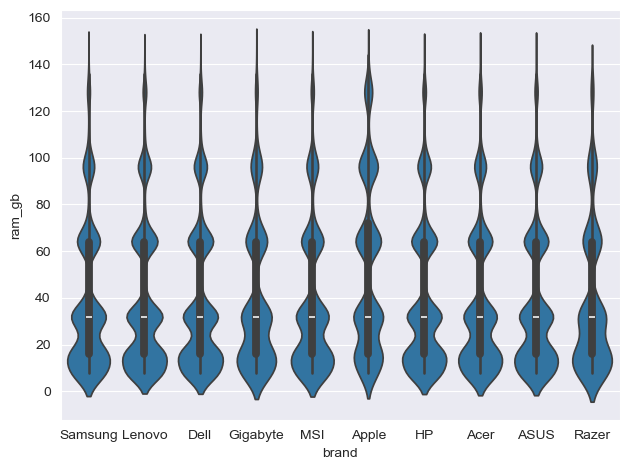

          brand  ram_gb
0       Samsung      16
1       Samsung      64
2        Lenovo       8
3          Dell      16
4      Gigabyte      96
...         ...     ...
99995      ASUS      32
99996    Lenovo       8
99997      ASUS      16
99998      ASUS      32
99999      Acer     128

[100000 rows x 2 columns]


C:\Users\tombo\AppData\Local\Temp\ipykernel_2888\658975425.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='brand', y='warranty_months', data=warrant_per_brand, palette='Set3')


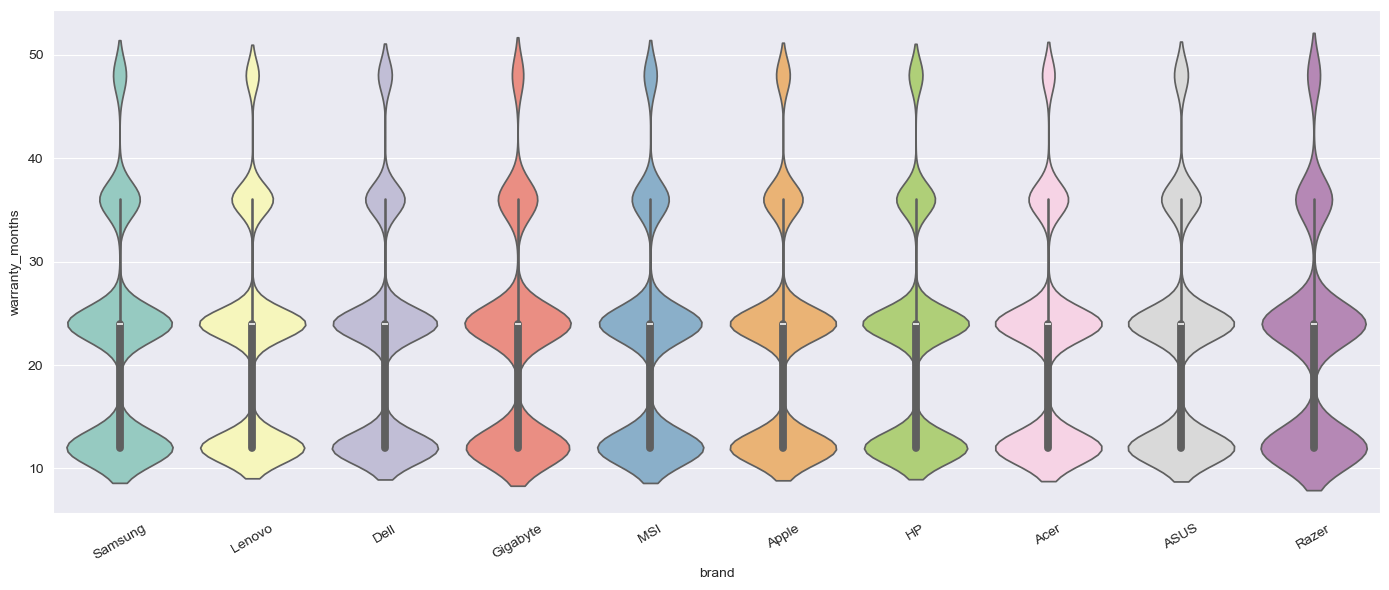

In [9]:
pcs = pd.read_csv("computer_prices_all.csv").drop(columns=['model', 'bluetooth', 'wifi','resolution']).drop(columns=['psu_watts', 'charger_watts', 'battery_wh', 'refresh_hz'])
pcs = pcs.drop(columns=['gpu_model','release_year','storage_drive_count'])
nnomPcs = pcs.drop(columns=["device_type","os","form_factor","cpu_brand","cpu_model","gpu_brand","storage_type","display_type"])
#brand vs. price------------------------------------------------------------------------------------------
#drop = ['gpu_model','release_year','storage_drive_count','model', 'bluetooth', 'wifi','resolution','psu_watts', 'charger_watts', 'battery_wh', 'refresh_hz',"device_type","os","form_factor","cpu_brand","cpu_model","gpu_brand","storage_type","display_type",'cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz',
#       'cpu_boost_ghz', 'gpu_tier', 'vram_gb', 'ram_gb', 'storage_gb',
#       'display_size_in', 'weight_kg', 'warranty_months']

brandcost = nnomPcs.drop(columns=['cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz',
       'cpu_boost_ghz', 'gpu_tier', 'vram_gb', 'ram_gb', 'storage_gb',
       'display_size_in', 'weight_kg', 'warranty_months'])
plt.figure(figsize=(14, 6))
sns.violinplot(x='brand', y='price', data=brandcost, palette='Set3')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
#brand vs. performance--------------------------------------------------------------------------------------------------
brandperformance = nnomPcs.drop(columns=['cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz',
       'cpu_boost_ghz', 'gpu_tier', 'vram_gb', 'storage_gb',
       'display_size_in', 'weight_kg','price', 'warranty_months'])

sns.violinplot(brandperformance,x = 'brand', y = 'ram_gb')
plt.tight_layout()
plt.show()
print(brandperformance)
#brand vs. warranty
warrant_per_brand = nnomPcs.drop(columns=['cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz',
       'cpu_boost_ghz', 'gpu_tier', 'vram_gb', 'storage_gb',
       'display_size_in', 'weight_kg','price', 'ram_gb','price'])
plt.figure(figsize=(14, 6))
sns.violinplot(x='brand', y='warranty_months', data=warrant_per_brand, palette='Set3')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
